In [1]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
%pylab inline
from autocnet_server.graph.graph import NetworkCandidateGraph

Populating the interactive namespace from numpy and matplotlib


## Network Candidate Graph Object

The AutoCNet project's (the library with the computer vision and photogrammetry logic that powers the AutoCNet_Server project) primary data structure is a candidate graph.  The AutoCNet Server (AS) project subclasses the CandidateGraph into a NetworkCandidateGraph to achieve a few goals:

- separate all of the data from the representation and support lazy access
- separate the analytics from the graph to support distributed computation
- support maximum scalability

Therefore, the NetworkCandidateGraph (NCG) acts like an AutoCNet candidate graph in that operations are performed on nodes (that represent images) and edges (that represent potential image overlap). The algorithms that exist in AutoCNet and have been used to research how to go about matching planetary images are exposed for use in the NCG.  When these algorithms are used though, the computation is pushed to a cluster job and the resultant data are stored in a database.  This allows the NCG to scale.

In [2]:
ncg = NetworkCandidateGraph.from_database()

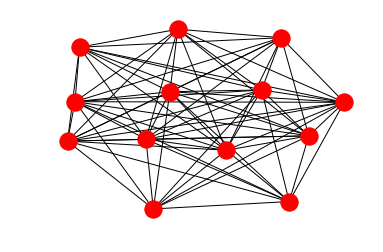

In [3]:
ncg.plot()

## SQL Queries for Database Creation
By default, the NCG will load **all** images in a project's `Images` table. This is not always desired (for example may P08 and P09 images are exceptionally noisy - dust storm?).  Therefore, it is possible to pass arbitrary queries to the `from_database` method.  The passed query (demonstrated below) are used as a subqueury inside of the spatial query that identifies overlap.  In practice this looks like:  `execute my custom query and get a subset of the data -> using the subset of the data, execute a spatial overlap query to build a graph object`.

In the example below, the NCG is built using all images that are **not** in a P orbit.

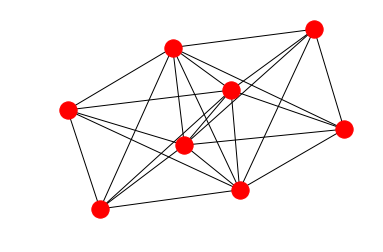

Exception in thread jdemo:working:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 562, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 397, in ring_matcher_callback
    if rm['count'] <= config['cluster']['maxfailures']:
KeyError: 'count'

Exception in thread jdemo:working:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 562, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 392, in ring_matcher_callback
    e = self.edges[source, destination]['data']
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/networkx/class

In [4]:
qs = "SELECT * FROM Images WHERE (split_part(path, '/', 6) ~ 'P[0-9]+_.+') = False"
ncg = NetworkCandidateGraph.from_database(query_string=qs)
ncg.plot()

### Spatial SubQuery

As another example, it is possible to execute a spatial subquery.  Here, image a use case where the entirety of the CTX data set has been processed through the ImageAdder.  A table with tens of thousands of CTX images and their associated footprints will be stored within a database.  This data store can be used as the source for different matching projects.  It may be that small region of interest should be processed.  The query below, selects those footprints that overlap the user supplied bounding polygon. (Note that for the demo that this notebook has been created the query will return no overlaps as the bounding polygon is outside of the demo extent.)

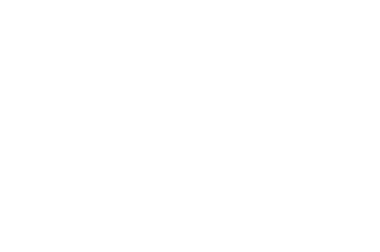

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 488, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 355, in ring_matcher_callback
    e = self.edges[source, destination]['data']
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/networkx/classes/reportviews.py", line 927, in __getitem__
    return self._adjdict[u][v]
KeyError: 1

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 488, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 355, in ring_matcher_c

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 488, in run
    callback_func = getattr(self.parent, msg['callback'])
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 355, in ring_matcher_callback
    e = self.edges[source, destination]['data']
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/networkx/classes/reportviews.py", line 927, in __getitem__
    return self._adjdict[u][v]
KeyError: 1

Exception in thread jdemo:done:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 488, in run
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 355, in ri

In [11]:
qs = "SELECT * FROM Images WHERE ST_INTERSECTS(footprint_latlon, ST_Polygon(ST_GeomFromText('LINESTRING(159 10, 159 11, 160 11, 160 10, 159 10)'),949900)) = TRUE"
ncg = NetworkCandidateGraph.from_database(query_string=qs)
ncg.plot()

In [ ]:
len(ncg.processing_queue), len(ncg.completed_queue)
#ncg.ring_match()

In [ ]:
for

In [ ]:
e['ring']

In [ ]:
s = 594
d = 616

e = ncg.edges[(s,d)]['data']
e.matches

for i in range(1,8):
    r = e.matches.iloc[i]
    fig, (ax1, ax2) = plt.subplots(1,2)
    a = ncg.node[s]['data'].geodata.read_array(pixels=[r.source_x-125, r.source_y-125, 250, 250])
    ax1.imshow(a)
    b = ncg.node[d]['data'].geodata.read_array(pixels=[r.destination_x-125, r.destination_y-125, 250, 250])
    ax2.imshow(b)
    show()

In [ ]:
sidx = e.matches.source_idx.values.tolist()
didx = e.matches.destination_idx.values.tolist()

skps = ncg.node[s]['data'].get_keypoints(index=sidx)
dkps = ncg.node[d]['data'].get_keypoints(index=didx)

def apply_plot(r, a,b):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(a[int(r.source_y-50):int(r.source_y+50),int(r.source_x-50):int(r.source_x+50)], cmap='Greys')
    ax2.imshow(b[int(r.destination_y-50):int(r.destination_y+50),int(r.destination_x-50):int(r.destination_x+50)], cmap='Greys')

    return fig

for i in range(len(sidx)):
    akp = skps.iloc[i].astype(int)
    bkp = dkps.iloc[i].astype(int)
    #print(akp, bkp)
    c
    fig.show()
    break

In [ ]:
e.matches

In [ ]:
n = ncg.node[930]['data']
print(n.geodata.footprint)

In [ ]:
32768 * 5000
